## Initical Cross-Matching

Code to generate beautifull histograms for initial radius cross-matching

In [1]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
observatory = '/data/mfonseca/'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

In [3]:
# EMU catalogs
emu_catalog_path = directory + '/survey_data/EMU_data/EMU_0102-32/EMU_0102-32_1comp.fits'

# DES catalogs
desy6gold_catalog_path = directory + '/survey_data/DES_data/DESY6GOLD_in_EMU_0102-32.fits'

# VIKING DR5 catalogs
vikingdr5_catalog_path = directory + '/survey_data/VIKING_data/VIKINGDR5_in_EMU_0102-32.fits'

# CatWISE catalogs
catwise_catalog_path = directory + '/survey_data/CATWISE_data/CATWISE2020_in_EMU_0102-32.fits'

In [ ]:
# EMU
emu_table = Table.read(emu_catalog_path)
emu_catalog_df = emu_table.to_pandas()

emu_coords = SkyCoord(ra=emu_catalog_df['ra_deg_cont'].values * u.deg,
                      dec=emu_catalog_df['dec_deg_cont'].values * u.deg)

# DES Y6 GOLD
desy6gold_table = Table.read(desy6gold_catalog_path)
desy6gold_catalog_df = desy6gold_table.to_pandas()

desy6gold_coords = SkyCoord(ra=desy6gold_catalog_df['ra'].values * u.deg,
                         dec=desy6gold_catalog_df['dec'].values * u.deg)


# VIKING DR5
viking_table = Table.read(vikingdr5_catalog_path)
viking_catalog_df = viking_table.to_pandas()

viking_coords = SkyCoord(ra=viking_catalog_df['ra'].values * u.deg,
                         dec=viking_catalog_df['dec'].values * u.deg)

# CatWISE 2020
catwise_table = Table.read(catwise_catalog_path)
catwise_catalog_df = catwise_table.to_pandas()

catwise_coords = SkyCoord(ra=catwise_catalog_df['ra'].values * u.deg,
                         dec=catwise_catalog_df['dec'].values * u.deg)


In [ ]:
def crossmatch_separation(cat1, cat2):

    idx, d2d, _ = cat1.match_to_catalog_sky(cat2)
    separation = d2d.arcsec

    return separation


## EMU x DES

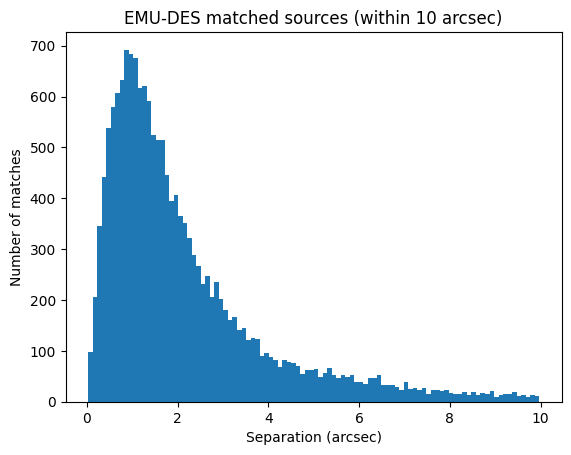

In [ ]:
idx, d2d, _ = emu_coords.match_to_catalog_sky(desy6gold_coords)

max_sep = 10 * u.arcsec
match_mask = d2d < max_sep

matched_emu = emu_coords[match_mask]
matched_des = desy6gold_coords[idx[match_mask]]
separation_des = d2d[match_mask].arcsec

plt.hist(separation_des, bins=100)
plt.xlabel("Separation (arcsec)")
plt.ylabel("Number of matches")
plt.title("EMU-DES matched sources (within 10 arcsec)")
plt.show()

## EMU x VIKING

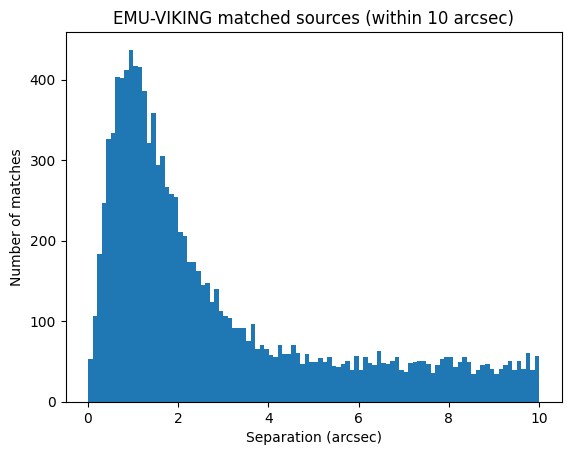

In [ ]:
idx, d2d, _ = emu_coords.match_to_catalog_sky(viking_coords)

max_sep = 10 * u.arcsec
match_mask = d2d < max_sep

matched_emu = emu_coords[match_mask]
matched_des = viking_coords[idx[match_mask]]
separation_viking = d2d[match_mask].arcsec

plt.hist(separation_viking, bins=100)
plt.xlabel("Separation (arcsec)")
plt.ylabel("Number of matches")
plt.title("EMU-VIKING matched sources (within 10 arcsec)")
plt.show()

## EMU x CatWISE

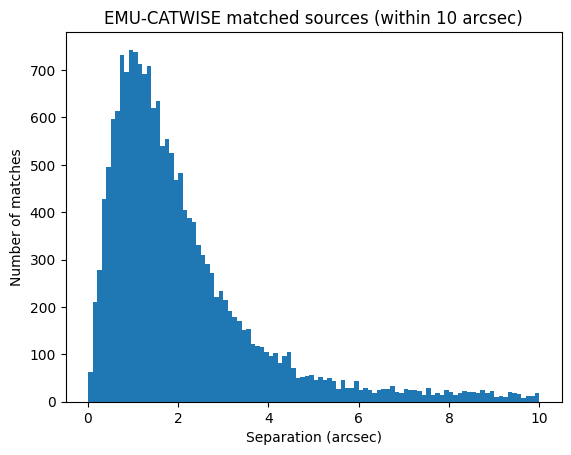

In [ ]:
idx, d2d, _ = emu_coords.match_to_catalog_sky(catwise_coords)

max_sep = 10 * u.arcsec
match_mask = d2d < max_sep

matched_emu = emu_coords[match_mask]
matched_des = catwise_coords[idx[match_mask]]
separation_catwise = d2d[match_mask].arcsec

plt.hist(separation_catwise, bins=100)
plt.xlabel("Separation (arcsec)")
plt.ylabel("Number of matches")
plt.title("EMU-CATWISE matched sources (within 10 arcsec)")
plt.show()

## Combined Histogram

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(separation_catwise, bins=100, color='blue', alpha=0.5, label = 'CATWISE')
plt.hist(separation_des, bins=100, color='red', alpha=0.5, label = 'DES Y6 GOLD')
plt.hist(separation_viking, bins=100, color='green', alpha=0.5,  label = 'VIKING DR4')
plt.xlabel("Separation (arcsec)", fontsize=15)
plt.ylabel("Number of matches", fontsize=15)
plt.title("EMU matched sources (within 10 arcsec)", fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize=15)
plt.show()

NameError: name 'plt' is not defined